In [1]:
import numpy as np

import pandas as pd

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')


In [14]:
DATA_PATH = Path.cwd()

df = pd.read_csv(DATA_PATH / "min_log.csv", thousands = ",")
df_depth_removed = df
df_depth_removed

,depth [ft],Calcite,Chlorite,Dolomite,Hematite,Illite,K-Feldspar,Kaolinite,Porosity,Quartz,Clay,Bulk
0,4361.25,0.92588,0.00000,0.00000,0.00000,0.00081,0.04413,0.01871,0.00140,0.00906,0.02091,62.943448
1,4361.75,0.91290,0.00000,0.00000,0.00000,0.01286,0.04058,0.01871,0.00292,0.01203,0.03449,71.044345
2,4362.25,0.89792,0.00000,0.00000,0.00000,0.02690,0.03663,0.01871,0.00612,0.01373,0.05029,74.103034
3,4362.75,0.88793,0.00000,0.00000,0.00000,0.02208,0.03811,0.01871,0.01713,0.01604,0.04486,65.059310
4,4363.25,0.88843,0.00000,0.00000,0.00000,0.00042,0.04504,0.01871,0.02810,0.01929,0.02048,57.365241
...,...,...,...,...,...,...,...,...,...,...,...,...
4127,6424.75,0.00000,0.12495,0.12561,0.03905,0.00000,0.36997,0.00000,0.02790,0.31253,0.13944,46.679172
4128,6425.25,0.00000,0.13879,0.12414,0.03595,0.00000,0.36525,0.00000,0.01995,0.31592,0.15489,48.549379
4129,6425.75,0.00000,0.14742,0.12339,0.03594,0.00000,0.36277,0.00000,0.01711,0.31336,0.16452,50.700552
4130,6426.25,0.00000,0.14721,0.11722,0.03946,0.00000,0.36283,0.00000,0.01708,0.31621,0.16428,52.013655


## Neural Network - a sequential - 3 layers

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pathlib import Path

# Assuming df_depth_removed is defined earlier
# ...

# Split the data into features (X) and target (y)
y = df_depth_removed["Bulk"].values.reshape(-1, 1)
X = df_depth_removed.drop(columns=["Bulk"]).values

# Split the data into training, validation, and testing sets (15-15-70 split)
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.3,  # 30% of the data for temporary set
    random_state=42,
)

# Further split the temporary set into validation and test sets (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,  # 50% of the remaining data for validation and test
    random_state=42,
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=2, callbacks=[early_stopping])

# Evaluate the model on the validation set
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)

# Evaluate the model on the test set
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print MSE for both validation and test sets
print(f'Mean Squared Error (Validation): {mse_val}')
print(f'Mean Squared Error (Test): {mse_test}')


Epoch 1/50
91/91 - 0s - loss: 837.2219 - val_loss: 414.5356
Epoch 2/50
91/91 - 0s - loss: 122.3514 - val_loss: 31.2743
Epoch 3/50
91/91 - 0s - loss: 27.9429 - val_loss: 25.0439
Epoch 4/50
91/91 - 0s - loss: 22.3016 - val_loss: 20.7003
Epoch 5/50
91/91 - 0s - loss: 18.5643 - val_loss: 17.5181
Epoch 6/50
91/91 - 0s - loss: 16.2474 - val_loss: 15.8499
Epoch 7/50
91/91 - 0s - loss: 14.6551 - val_loss: 14.2876
Epoch 8/50
91/91 - 0s - loss: 13.6143 - val_loss: 13.4795
Epoch 9/50
91/91 - 0s - loss: 13.0268 - val_loss: 12.6872
Epoch 10/50
91/91 - 0s - loss: 12.4736 - val_loss: 12.2228
Epoch 11/50
91/91 - 0s - loss: 12.0837 - val_loss: 11.8949
Epoch 12/50
91/91 - 0s - loss: 11.6855 - val_loss: 11.5520
Epoch 13/50
91/91 - 0s - loss: 11.4484 - val_loss: 11.2924
Epoch 14/50
91/91 - 0s - loss: 11.1368 - val_loss: 11.3283
Epoch 15/50
91/91 - 0s - loss: 11.2337 - val_loss: 10.9968
Epoch 16/50
91/91 - 0s - loss: 10.9132 - val_loss: 10.8928
Epoch 17/50
91/91 - 0s - loss: 10.8281 - val_loss: 10.6772
Epo

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pathlib import Path

# Split the data into features (X) and target (y)
y = df_depth_removed["Bulk"].values.reshape(-1, 1)
X = df_depth_removed.drop(columns=["Bulk"]).values

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.2,  # 20% of the data for testing + temporary set
    random_state=42,
)

# Further split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,  # 50% of the remaining data for validation and test
    random_state=42,
)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=2, callbacks=[early_stopping])

# Evaluate the model on the validation set
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)

# Evaluate the model on the test set
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print MSE for both validation and test sets
print(f'Mean Squared Error (Validation): {mse_val}')
print(f'Mean Squared Error (Test): {mse_test}')


Epoch 1/50
104/104 - 0s - loss: 787.9827 - val_loss: 307.6873
Epoch 2/50
104/104 - 0s - loss: 89.1077 - val_loss: 40.1360
Epoch 3/50
104/104 - 0s - loss: 32.4156 - val_loss: 30.0153
Epoch 4/50
104/104 - 0s - loss: 24.6191 - val_loss: 23.1864
Epoch 5/50
104/104 - 0s - loss: 19.4613 - val_loss: 18.5375
Epoch 6/50
104/104 - 0s - loss: 16.2992 - val_loss: 16.0653
Epoch 7/50
104/104 - 0s - loss: 14.4272 - val_loss: 14.7960
Epoch 8/50
104/104 - 0s - loss: 13.2140 - val_loss: 13.6427
Epoch 9/50
104/104 - 0s - loss: 12.5165 - val_loss: 14.2245
Epoch 10/50
104/104 - 0s - loss: 11.8977 - val_loss: 12.6479
Epoch 11/50
104/104 - 0s - loss: 11.3438 - val_loss: 12.3479
Epoch 12/50
104/104 - 0s - loss: 11.1139 - val_loss: 12.1837
Epoch 13/50
104/104 - 0s - loss: 10.7420 - val_loss: 11.8709
Epoch 14/50
104/104 - 0s - loss: 10.4536 - val_loss: 11.7812
Epoch 15/50
104/104 - 0s - loss: 10.2969 - val_loss: 11.8295
Epoch 16/50
104/104 - 0s - loss: 10.0693 - val_loss: 11.5285
Epoch 17/50
104/104 - 0s - loss

# Visualization - val + test

In [10]:
# Convert y_test to a DataFrame to get the original indices
y_test_df = pd.DataFrame(y_test, columns=['True Values (Test)'])

# Create a DataFrame with test truth and predicted values
results_df_test = pd.DataFrame({
    'Depth': df_depth_removed.loc[y_test_df.index, 'depth [ft]'],  # Use the original depth values corresponding to the test set
    'True Values (Test)': y_test_df['True Values (Test)'].values,
    'Predicted Values (Test)': y_pred_test.flatten()
})

# Display the DataFrame for the test set
print("Test Set Results:")
print(results_df_test)


Test Set Results:
       Depth  True Values (Test)  Predicted Values (Test)
0    4361.25           57.851655                65.194519
1    4361.75           25.786690                24.779236
2    4362.25           65.894000                66.469292
3    4362.75           22.259034                20.333281
4    4363.25           25.561448                25.461037
..       ...                 ...                      ...
615  4668.75           47.651103                48.095226
616  4669.25           21.416621                20.104372
617  4669.75           25.559724                24.594257
618  4670.25           50.288276                47.648655
619  4670.75           27.784759                29.714233

[620 rows x 3 columns]


In [11]:
# Convert y_test to a DataFrame to get the original indices
y_val_df = pd.DataFrame(y_val, columns=['True Values (Validation)'])

# Create a DataFrame with test truth and predicted values
results_df_val = pd.DataFrame({
    'Depth': df_depth_removed.loc[y_val_df.index, 'depth [ft]'],  # Use the original depth values corresponding to the test set
    'True Values (Validation)': y_val_df['True Values (Validation)'].values,
    'Predicted Values (Validation)': y_pred_val.flatten()
})

# Display the DataFrame for the test set
print("Validation Set Results:")
print(results_df_val)


Validation Set Results:
       Depth  True Values (Validation)  Predicted Values (Validation)
0    4361.25                 24.670138                      24.675407
1    4361.75                 40.978690                      40.423733
2    4362.25                 23.427172                      23.443365
3    4362.75                 23.552414                      21.475092
4    4363.25                 18.568207                      19.521250
..       ...                       ...                            ...
615  4668.75                 28.454483                      26.253180
616  4669.25                 19.050345                      19.222990
617  4669.75                 18.502828                      17.737638
618  4670.25                 23.832966                      24.944426
619  4670.75                 18.008207                      18.277676

[620 rows x 3 columns]


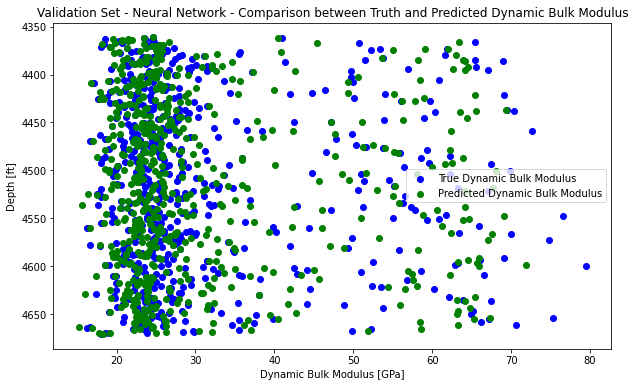

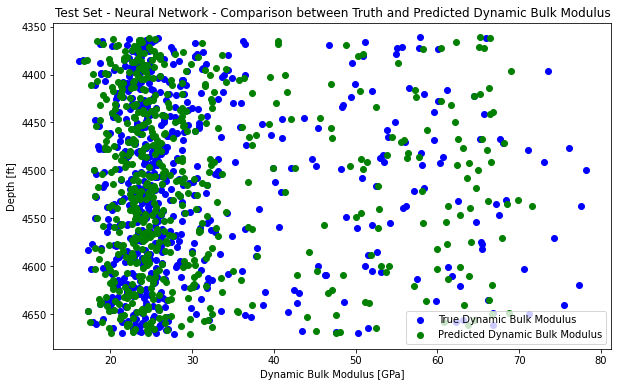

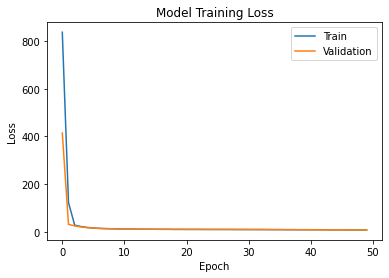

In [12]:
# Scatter plot for validation set
plt.figure(figsize=(10, 6))
plt.scatter(results_df_val['True Values (Validation)'],results_df_val['Depth'], label='True Dynamic Bulk Modulus', color='blue')
plt.scatter(results_df_val['Predicted Values (Validation)'],results_df_val['Depth'], label='Predicted Dynamic Bulk Modulus', color='green')
# Reverse the y-axis
plt.gca().invert_yaxis()
plt.title('Validation Set - Neural Network - Comparison between Truth and Predicted Dynamic Bulk Modulus')
plt.xlabel('Dynamic Bulk Modulus [GPa]')
plt.ylabel('Depth [ft]')
plt.legend()
plt.show()

# Scatter plot for test set
plt.figure(figsize=(10, 6))
plt.scatter(results_df_test['True Values (Test)'],results_df_test['Depth'], label='True Dynamic Bulk Modulus', color='blue')
plt.scatter(results_df_test['Predicted Values (Test)'],results_df_test['Depth'], label='Predicted Dynamic Bulk Modulus', color='green')
# Reverse the y-axis
plt.gca().invert_yaxis()
plt.title('Test Set - Neural Network - Comparison between Truth and Predicted Dynamic Bulk Modulus')
plt.xlabel('Dynamic Bulk Modulus [GPa]')
plt.ylabel('Depth [ft]')
plt.legend()
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()